# RESEARCH

##  **Random forest**

- Supervised ML Algorithm, used widely in Classification and Regression problems
- Builds decision trees on different samples and takes their majority vote (for classification) and average (for regression).
- Can handle the data set containing **continuous variables** (regression) and **categorical variables** (classification)

**How it works**
- *Ensemble technique*: combining multiple models. Uses two types of methods: Bagging & Boosting\
    Random Forest uses *bagging*: creates a different training subset from sample training data with replacement & the final output is based on majority voting
- *Bagging method*: 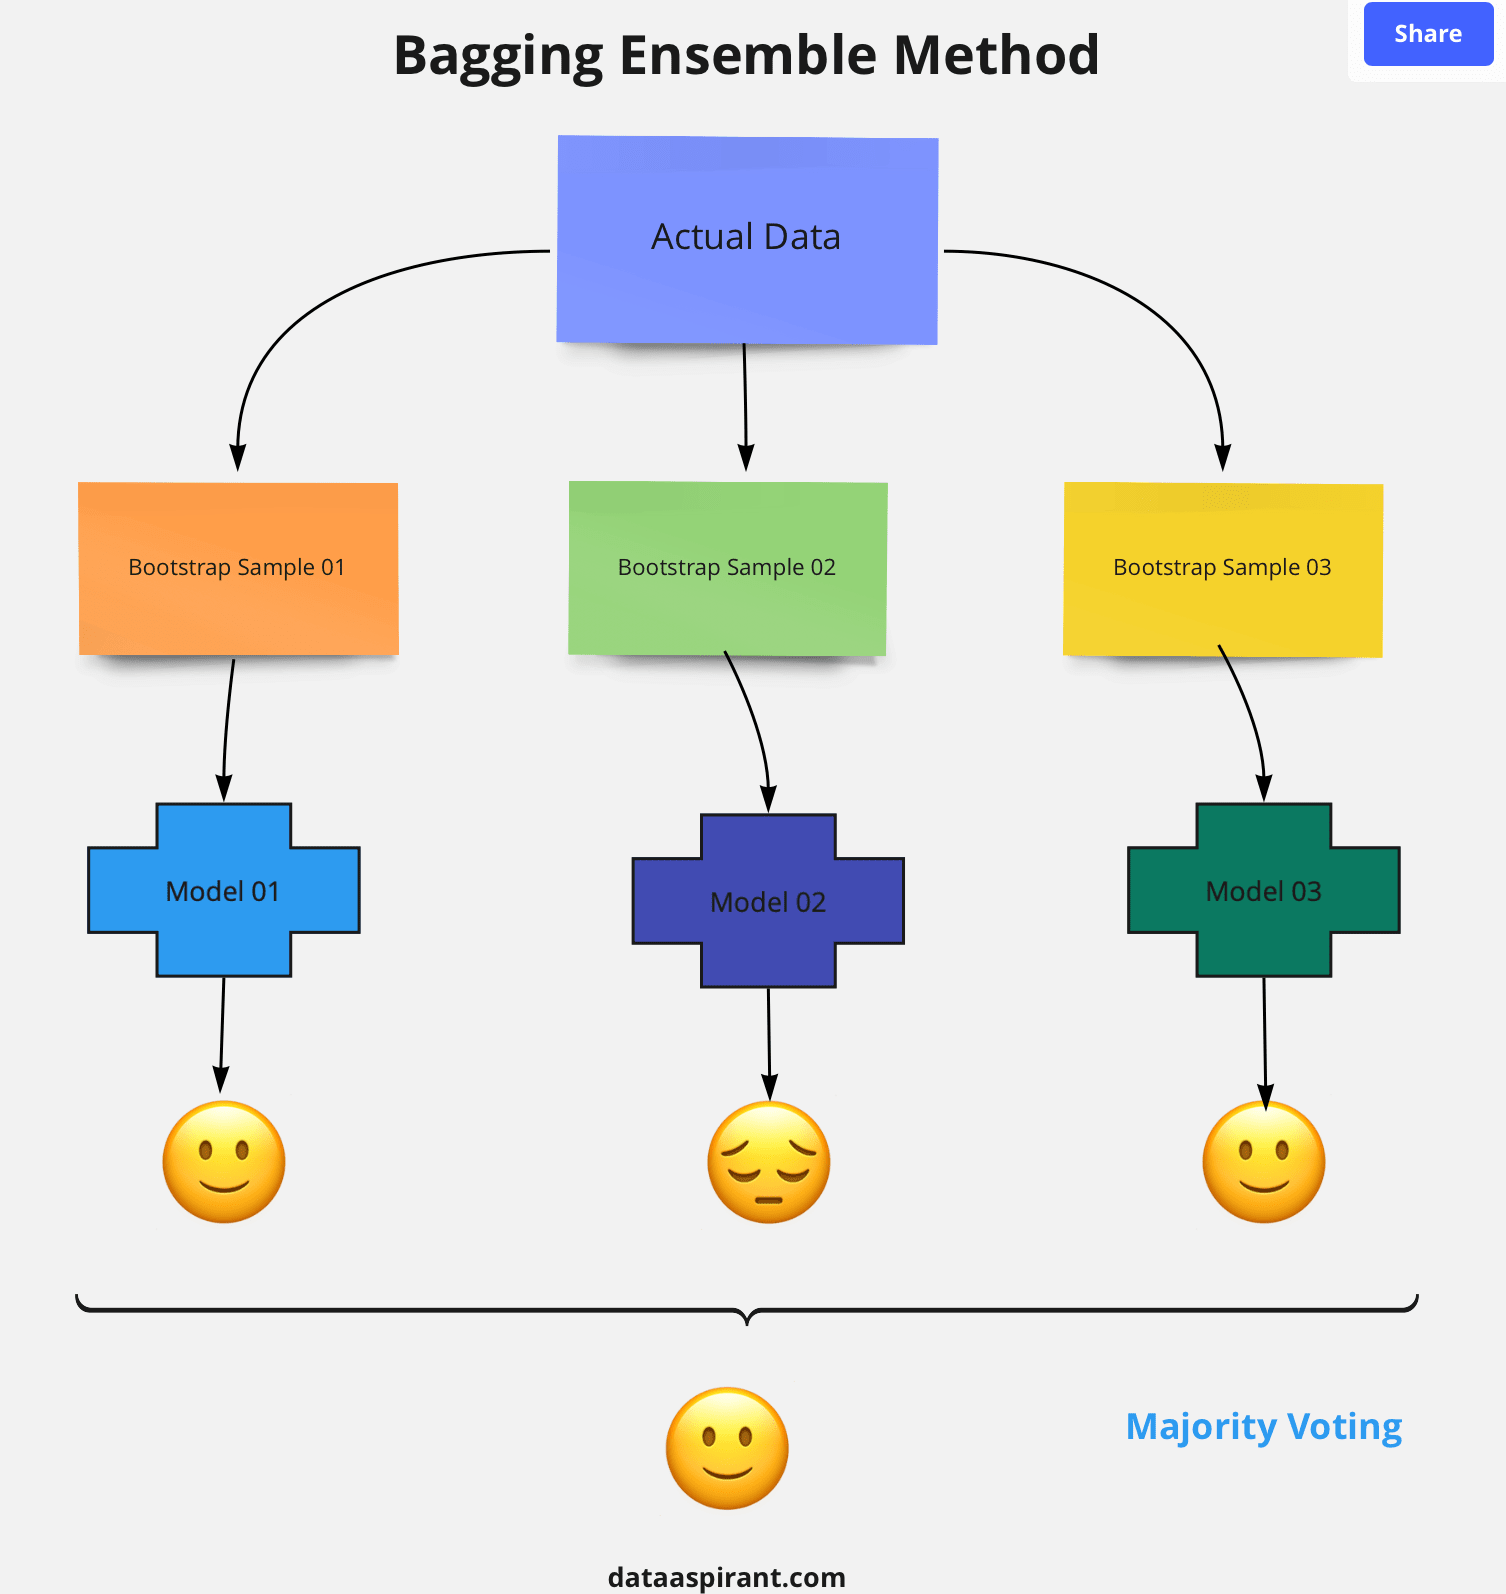
- *Steps involved in random forest algorithm*:\
Step 1: In Random forest n number of random records are taken from the data set having k number of records.\
Step 2: Individual decision trees are constructed for each sample.\
Step 3: Each decision tree will generate an output.\
Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

# MAIN TASKS

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
RedWine = pd.read_csv("E:\LAB\ScaleMind\git\WineQuality\Data set\winequality-red.csv", sep = ';')
RedWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Split data set

In [19]:
features = RedWine.drop(columns='quality')
quality = RedWine['quality']

In [21]:
from sklearn.model_selection import train_test_split

features_train, features_test, quality_train, quality_test = train_test_split(features, quality, test_size=0.2, random_state=0)

In [22]:
features_test.shape

(320, 11)

In [23]:
features_train.shape

(1279, 11)

Create 2 traning sets

In [25]:
st_scale = StandardScaler()
features_train_scaled = pd.DataFrame(st_scale.fit_transform(features_train), 
                                    columns=features.columns)
features_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.901034,0.054803,0.909414,-0.174359,-0.335359,-0.003122,-0.211913,1.244895,0.520910,-0.223584,-0.955794
1,1.419987,-1.479676,0.909414,0.514355,-0.565570,0.377220,0.056175,0.235179,-1.168416,-0.681310,-0.767274
2,0.901034,-0.986451,1.420842,-0.312102,-0.523713,-1.049065,-0.986389,0.182036,-0.323753,0.749083,0.175328
3,-1.578410,1.753690,-1.136297,-0.794202,-0.879493,-0.383465,1.217889,-2.315682,1.625469,0.920730,2.343314
4,-1.001795,1.068655,-0.931726,2.029526,0.627340,-0.668722,-0.897027,-0.110250,0.261014,-0.967388,0.363849
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.555065,0.685035,-0.062299,-0.380974,0.187847,-1.049065,-0.360851,0.330837,-0.388727,-1.367898,-0.767274
1275,-0.425180,0.739838,-0.880584,-0.725331,-0.440000,1.042820,0.234900,-0.110250,0.520910,-0.852957,-1.050055
1276,-0.252196,0.219211,0.193415,-0.380974,-0.167933,-0.573637,0.949801,0.006665,-0.128831,0.176926,-0.861534
1277,2.688540,-0.328817,1.113985,1.203069,-0.042364,-0.953979,-0.003400,2.839184,-0.063856,0.119710,2.154793


Apply Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [29]:
%%time
classifier_rf.fit(features_train, quality_train)

CPU times: total: 172 ms
Wall time: 130 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)